#Mush Farmoatic - Clustering (Self-Organizing Map)

---


2301931251 - Daffa Rizki Rizaly

2301869840 - William Yulio


In [ ]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow.compat.v1 as tf 

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#Import dataset
data = pd.read_csv('clustering.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,4,1,p,e,3,2,2,7,7,p,2,1,4,2,s,u
1,e,x,s,9,1,a,e,2,2,2,7,7,p,2,1,4,3,n,g
2,e,b,s,8,1,l,e,2,2,2,7,7,p,2,1,4,3,n,m
3,p,x,y,8,1,p,e,3,2,2,7,7,p,2,1,4,2,s,u
4,e,x,s,3,0,n,t,3,2,2,7,7,p,2,1,0,3,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,e,b,s,9,1,a,e,2,2,2,7,7,p,2,1,4,3,n,m
496,e,f,f,8,0,n,t,3,0,2,7,7,p,2,1,0,3,a,g
497,e,f,y,4,1,a,e,4,2,3,7,7,p,2,1,4,3,s,g
498,e,x,y,8,1,a,e,2,2,2,7,7,p,2,1,4,3,s,g


In [ ]:
#Feature Selection

for i in range(len(data)):
  #Odor
  if data['odor'][i] == 's':
    data['odor'][i] = 9
  elif data['odor'][i] == 'p':
    data['odor'][i] = 8
  elif data['odor'][i] == 'n':
    data['odor'][i] = 7
  elif data['odor'][i] == 'm':
    data['odor'][i] = 6
  elif data['odor'][i] == 'f':
    data['odor'][i] = 5
  elif data['odor'][i] == 'y':
    data['odor'][i] = 4
  elif data['odor'][i] == 'c':
    data['odor'][i] = 3
  elif data['odor'][i] == 'l':
    data['odor'][i] = 2
  elif data['odor'][i] == 'a':
    data['odor'][i] = 1

  #Stalk Shape
  if data['stalk-shape'][i] == 'e':
    data['stalk-shape'][i] = 1
  elif data['stalk-shape'][i] == 't':
    data['stalk-shape'][i] = 2


  #Veil Type
  if data['veil-type'][i] == 'p':
    data['veil-type'][i] = 1
  elif data['veil-type'][i] == 'u':
    data['veil-type'][i] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying

In [ ]:
data = data[['bruises','odor','stalk-shape','veil-type','spore-print-color']]
data

,bruises,odor,stalk-shape,veil-type,spore-print-color
0,1,8,1,1,2
1,1,1,1,1,3
2,1,2,1,1,3
3,1,8,1,1,2
4,0,7,2,1,3
...,...,...,...,...,...
495,1,1,1,1,3
496,0,7,2,1,3
497,1,1,1,1,3
498,1,1,1,1,3


In [ ]:
#Feature Extraction
scaler = StandardScaler()
data = scaler.fit_transform(data)

print(data)

pca = PCA(n_components=3)
pca = pca.fit(data)
dataset = pca.transform(data)
print(dataset)

[[ 0.44935852  1.85141175 -0.45897032  0.         -0.85522203]
 [ 0.44935852 -0.78915105 -0.45897032  0.          0.42889513]
 [ 0.44935852 -0.4119278  -0.45897032  0.          0.42889513]
 ...
 [ 0.44935852 -0.78915105 -0.45897032  0.          0.42889513]
 [ 0.44935852 -0.78915105 -0.45897032  0.          0.42889513]
 [ 0.44935852 -0.4119278  -0.45897032  0.         -0.85522203]]
[[ 0.58212779 -1.34725937 -0.55639785]
 [-0.95138328  0.38122028 -0.24178172]
 [-0.72077774  0.27576442 -0.40023981]
 ...
 [-0.95138328  0.38122028 -0.24178172]
 [-0.95138328  0.38122028 -0.24178172]
 [-0.80150548 -0.7145242   0.39435066]]


In [ ]:
#SOM
class SOM:

    def __init__(self, height, width, input_dimension):
        self.height = height
        self.width = width
        self.input_dimension = input_dimension
        self.location = [tf.to_float([y, x])
                         for y in range(height) for x in range(width)]

        self.weight = tf.Variable(tf.random_normal(
            [width*height, input_dimension]))
            
        self.input = tf.placeholder(tf.float32, [input_dimension])

        best_matching_unit = self.get_bmu()

        self.updated_weight, self.rate_stacked = self.update_neighbour(
            best_matching_unit)

    def get_bmu(self):
        square_difference = tf.square(self.input - self.weight)
        distance = tf.sqrt(tf.reduce_mean(square_difference, axis=1))

        bmu_index = tf.argmin(distance)
        bmu_location = tf.to_float(
            [tf.div(bmu_index, self.width), tf.mod(bmu_index, self.width)])

        return bmu_location

    def update_neighbour(self, bmu):
        learning_rate = 0.2

        sigma = tf.to_float(tf.maximum(self.width, self.height)/2)

        square_difference = tf.square(self.location - bmu)
        distance = tf.sqrt(tf.reduce_mean(square_difference, axis=1))

        neighbour_strength = tf.exp(
            tf.div(tf.negative(tf.square(distance)), 2 * tf.square(sigma)))

        rate = neighbour_strength * learning_rate
        total_node = self.width * self.height
        rate_stacked = tf.stack([tf.tile(tf.slice(rate, [i], [1]), [
                                self.input_dimension]) for i in range(total_node)])

        input_weight_difference = tf.subtract(self.input, self.weight)

        weight_difference = tf.multiply(rate_stacked, input_weight_difference)

        weight_new = tf.add(self.weight, weight_difference)

        return tf.assign(self.weight, weight_new), rate_stacked

    def train(self, dataset, num_of_epoch):
        init = tf.global_variables_initializer()

        with tf.Session() as sess:
            sess.run(init)

            for i in range(num_of_epoch):
                for data in dataset:
                    sess.run(self.updated_weight, feed_dict={
                        self.input: data
                    })

            cluster = [[] for i in range(self.height)]
            location = sess.run(self.location)
            weight = sess.run(self.weight)

            for i, loc in enumerate(location):
                print(i, loc[0])
                cluster[int(loc[0])].append(weight[i])

            self.cluster = cluster


Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 2.0
13 2.0
14 2.0
15 2.0
16 2.0
17 2.0
18 3.0
19 3.0
20 3.0
21 3.0
22 3.0
23 3.0
24 4.0
25 4.0
26 4.0
27 4.0
28 4.0
29 4.0
30 5.0
31 5.0
32 5.0
33 5.0
34 5.0
35 5.0


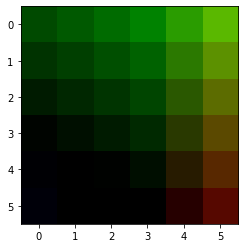

In [ ]:
def main():

    height = 6
    width = 6

    input_dimension = 3
    som = SOM(height, width, input_dimension)
    som.train(dataset, 2500)

    plt.imshow(som.cluster)
    plt.show()

main()